In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("cycling.csv", sep=r"\s+")


In [39]:
df.columns

Index(['all_riders', 'rider_class', 'stage', 'points', 'stage_class'], dtype='object')

In [40]:
print(df.isna().any().any())

False


In [41]:
df.dtypes

all_riders     object
rider_class    object
stage          object
points          int64
stage_class    object
dtype: object

In [42]:
df.describe()

,points
count,3496.000000
mean,12.385297
std,36.285334
min,0.000000
25%,0.000000
50%,0.000000
75%,8.000000
max,304.000000


In [43]:
df.head(5)

,all_riders,rider_class,stage,points,stage_class
0,Tadej Pogačar,All Rounder,X1,15,flat
1,Tadej Pogačar,All Rounder,X2,219,hills
2,Tadej Pogačar,All Rounder,X3,34,flat
3,Tadej Pogačar,All Rounder,X4,264,hills
4,Tadej Pogačar,All Rounder,X6,114,hills


In [44]:
df["scored"] = (df["points"] > 0).astype(int)

In [45]:
rider_summary = (
    df.groupby("all_riders")
    .agg(
        scoring_rate=("scored", "mean"),  
        rider_class=("rider_class", "first"),
    )
    .reset_index()
)

# Descriptive Statistics of Scoring Rates by Rider Class

In [47]:
rider_class_description = rider_summary.groupby("rider_class")["scoring_rate"].describe()
rider_class_description

,count,mean,std,min,25%,50%,75%,max
rider_class,,,,,,,,
All Rounder,17.0,0.643963,0.334702,0.052632,0.473684,0.526316,1.000000,1.000000
Climber,23.0,0.610984,0.316482,0.000000,0.394737,0.684211,0.947368,1.000000
Sprinter,29.0,0.350272,0.260997,0.000000,0.157895,0.315789,0.421053,1.000000
Unclassed,115.0,0.305263,0.245007,0.000000,0.105263,0.210526,0.447368,0.947368


#

# Box plot of Scoring Rate Distribution by Rider Class

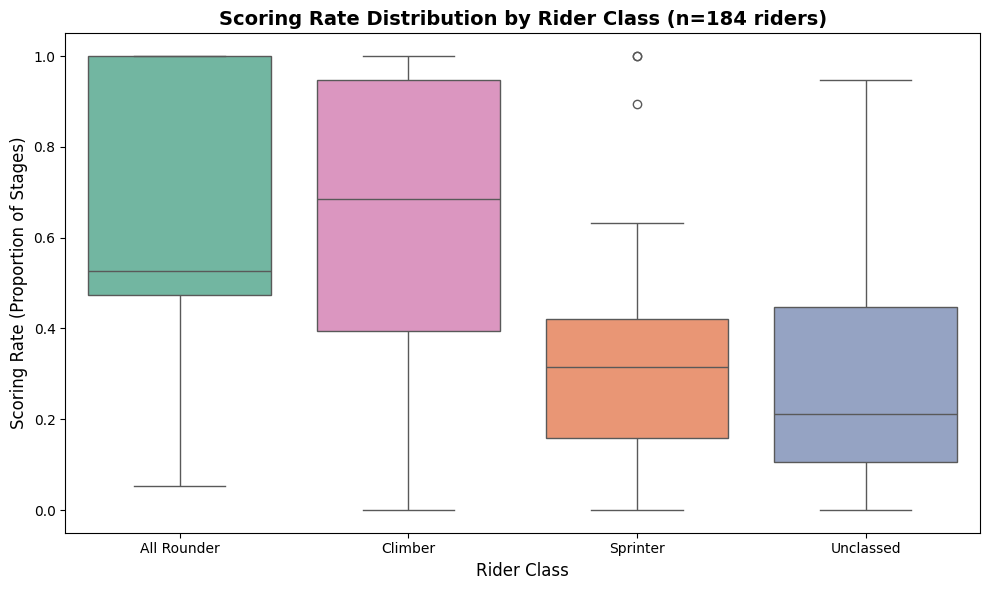

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=rider_summary, x='rider_class', y='scoring_rate', 
            order=['All Rounder', 'Climber', 'Sprinter', 'Unclassed'],palette='Set2',hue='rider_class', ax=ax)
ax.set_xlabel('Rider Class', fontsize=12)
ax.set_ylabel('Scoring Rate (Proportion of Stages)', fontsize=12)
ax.set_title('Scoring Rate Distribution by Rider Class (n=184 riders)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('figure1_overall_scoring_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# Box plots of Scoring Rates by Rider Class across Stage Classes

In [48]:
# rider stage class level aggregation
rider_terrain = (
    df.groupby(["all_riders", "stage_class", "rider_class"])
    .agg(scoring_rate=("scored", "mean"))
    .reset_index()
)
rider_stage_median = rider_terrain.groupby(["rider_class", "stage_class"])["scoring_rate"].median().unstack()
rider_stage_median


stage_class,flat,hills,mount
rider_class,,,
All Rounder,0.500000,0.750,1.0
Climber,0.500000,0.625,0.8
Sprinter,0.500000,0.250,0.0
Unclassed,0.333333,0.250,0.2


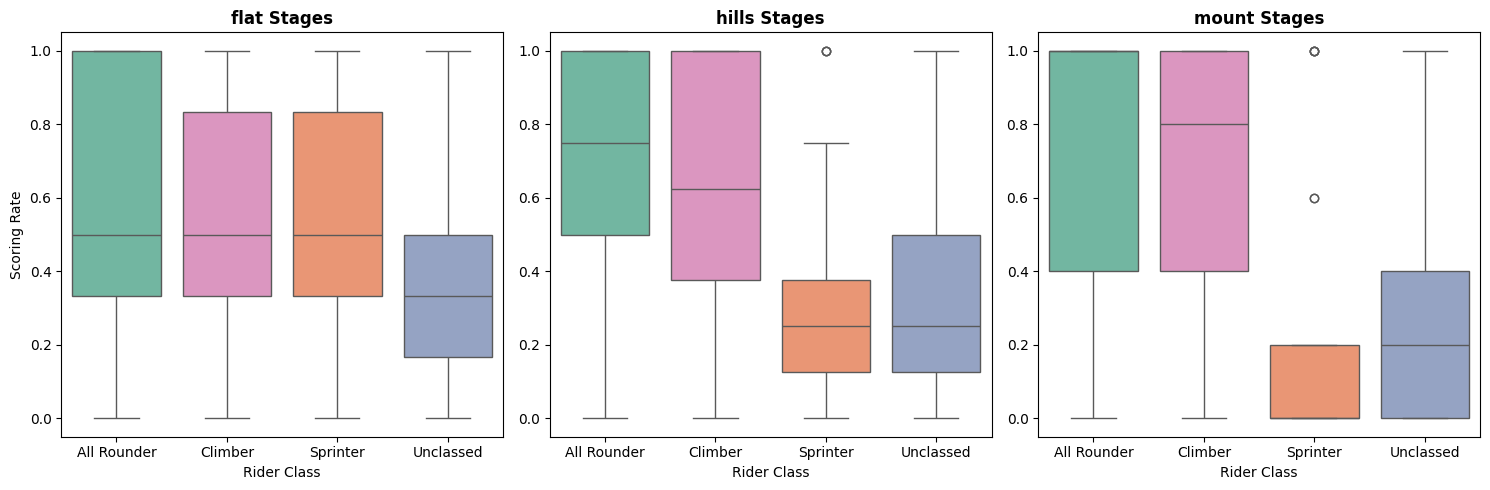

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
terrains = ['flat', 'hills', 'mount']

for idx, terrain in enumerate(terrains):
    terrain_data = rider_terrain[rider_terrain['stage_class'] == terrain]
    sns.boxplot(data=terrain_data, x='rider_class', y='scoring_rate', 
                order=['All Rounder', 'Climber', 'Sprinter', 'Unclassed'],
                ax=axes[idx],
                palette='Set2',
                hue='rider_class'
                )
    axes[idx].set_xlabel('Rider Class', fontsize=10)
    axes[idx].set_ylabel('Scoring Rate' if idx == 0 else '', fontsize=10)
    axes[idx].set_title(f'{terrain} Stages', fontsize=12, fontweight='bold')
    if idx > 0:
        axes[idx].set_ylabel('')

plt.tight_layout()
#plt.savefig('figure2_terrain_specific_scoring.png', dpi=300, bbox_inches='tight')
plt.show()